In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv("C:\\Users\\naval\\Downloads\\archive (11)\\BMIData.csv")
df.head(10)

,SchoolYear,NameHospital,Sex,EpiUnderweight,EpiHealthyWeight,EpiOverweight,EpiObese,EpiOverweightAndObese,ValidCounts,UnvalidCounts,TotalCounts
0,2001,Borders,Female,2,334,54,28,82,418,82,500
1,2001,Borders,Male,5,301,63,42,105,411,105,516
2,2001,Lothian,Female,12,728,133,106,239,979,239,1218
3,2001,Lothian,Male,17,681,124,114,238,936,238,1174
4,2001,Fife,Female,17,1361,231,155,386,1764,386,2150
5,2001,Fife,Male,24,1365,244,219,463,1852,463,2315
6,2001,Lanarkshire,Female,57,2280,319,287,606,2943,606,3549
7,2001,Lanarkshire,Male,72,2231,347,281,628,2931,628,3559
8,2002,Lothian,Female,10,634,125,107,232,876,232,1108
9,2002,Lothian,Male,23,611,126,105,231,865,231,1096


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SchoolYear             516 non-null    int64 
 1   NameHospital           516 non-null    object
 2   Sex                    516 non-null    object
 3   EpiUnderweight         516 non-null    int64 
 4   EpiHealthyWeight       516 non-null    int64 
 5   EpiOverweight          516 non-null    int64 
 6   EpiObese               516 non-null    int64 
 7   EpiOverweightAndObese  516 non-null    int64 
 8   ValidCounts            516 non-null    int64 
 9   UnvalidCounts          516 non-null    int64 
 10  TotalCounts            516 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.5+ KB


In [8]:
df.isnull().sum()

SchoolYear               0
NameHospital             0
Sex                      0
EpiUnderweight           0
EpiHealthyWeight         0
EpiOverweight            0
EpiObese                 0
EpiOverweightAndObese    0
ValidCounts              0
UnvalidCounts            0
TotalCounts              0
dtype: int64

In [9]:
numerical_col=df.select_dtypes(include=['int64']).columns
categorical_col=df.select_dtypes(include=['object']).columns
numerical_col

Index(['SchoolYear', 'EpiUnderweight', 'EpiHealthyWeight', 'EpiOverweight',
       'EpiObese', 'EpiOverweightAndObese', 'ValidCounts', 'UnvalidCounts',
       'TotalCounts'],
      dtype='object')

In [10]:
categorical_col

Index(['NameHospital', 'Sex'], dtype='object')

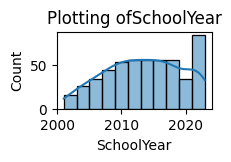

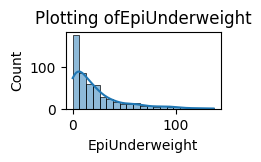

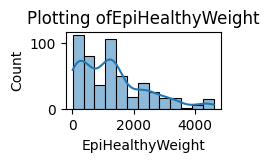

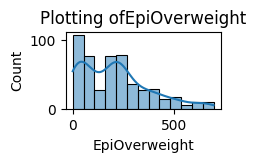

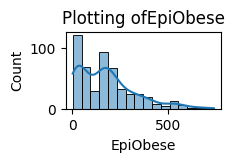

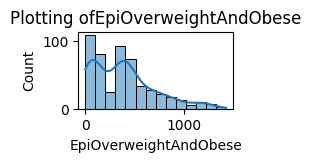

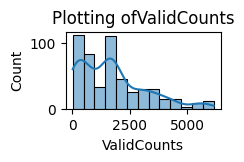

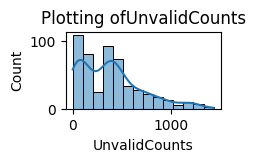

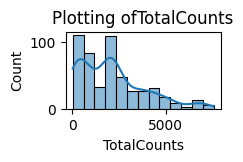

In [11]:
for col in numerical_col:
    plt.figure(figsize=(2,1))
    sns.histplot(df[col],kde=True)
    plt.title(f'Plotting of{col}')

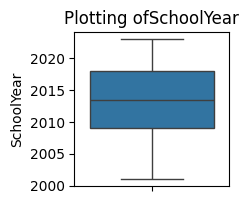

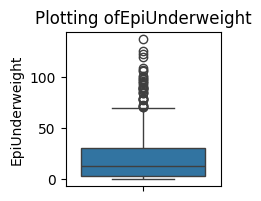

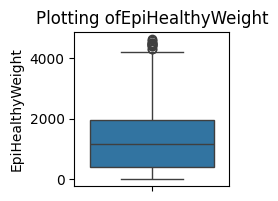

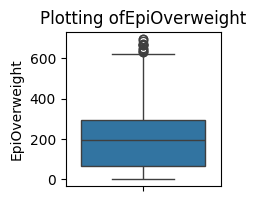

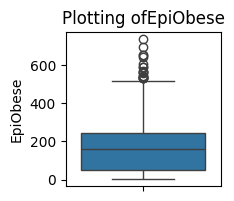

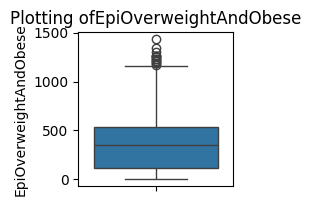

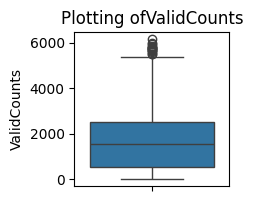

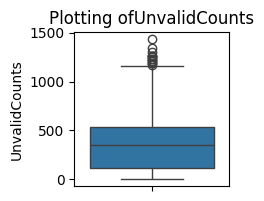

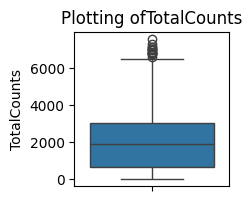

In [12]:
for col in numerical_col:
    plt.figure(figsize=(2,2))
    sns.boxplot(df[col])
    plt.title(f'Plotting of{col}')

In [13]:
df[categorical_col].nunique()

NameHospital    14
Sex              2
dtype: int64

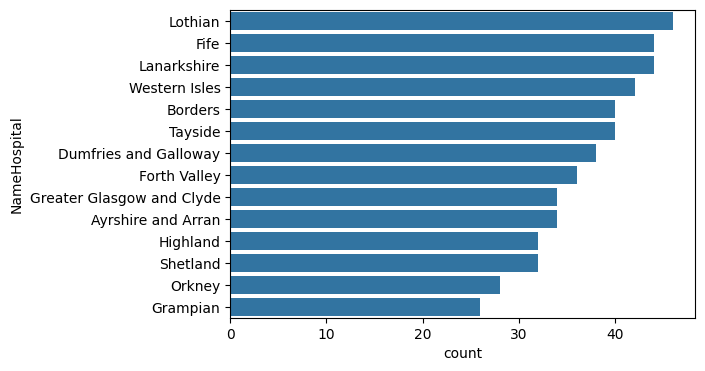

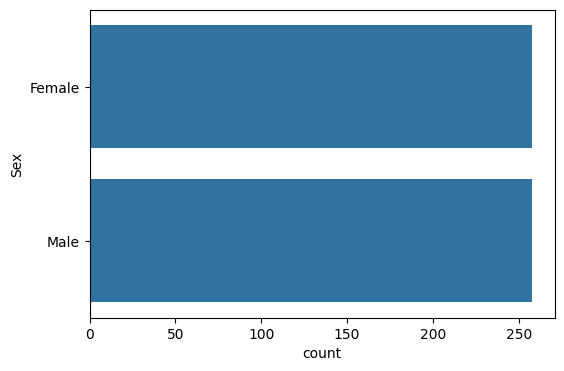

In [14]:
for col in categorical_col:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col],order=df[col].value_counts().index)
    plt.show()

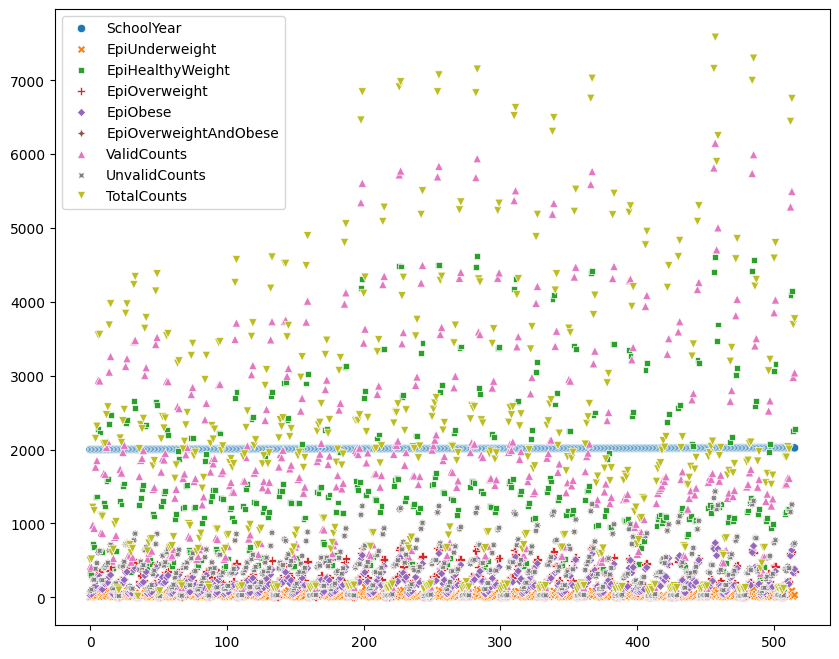

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(df[numerical_col])
plt.show()

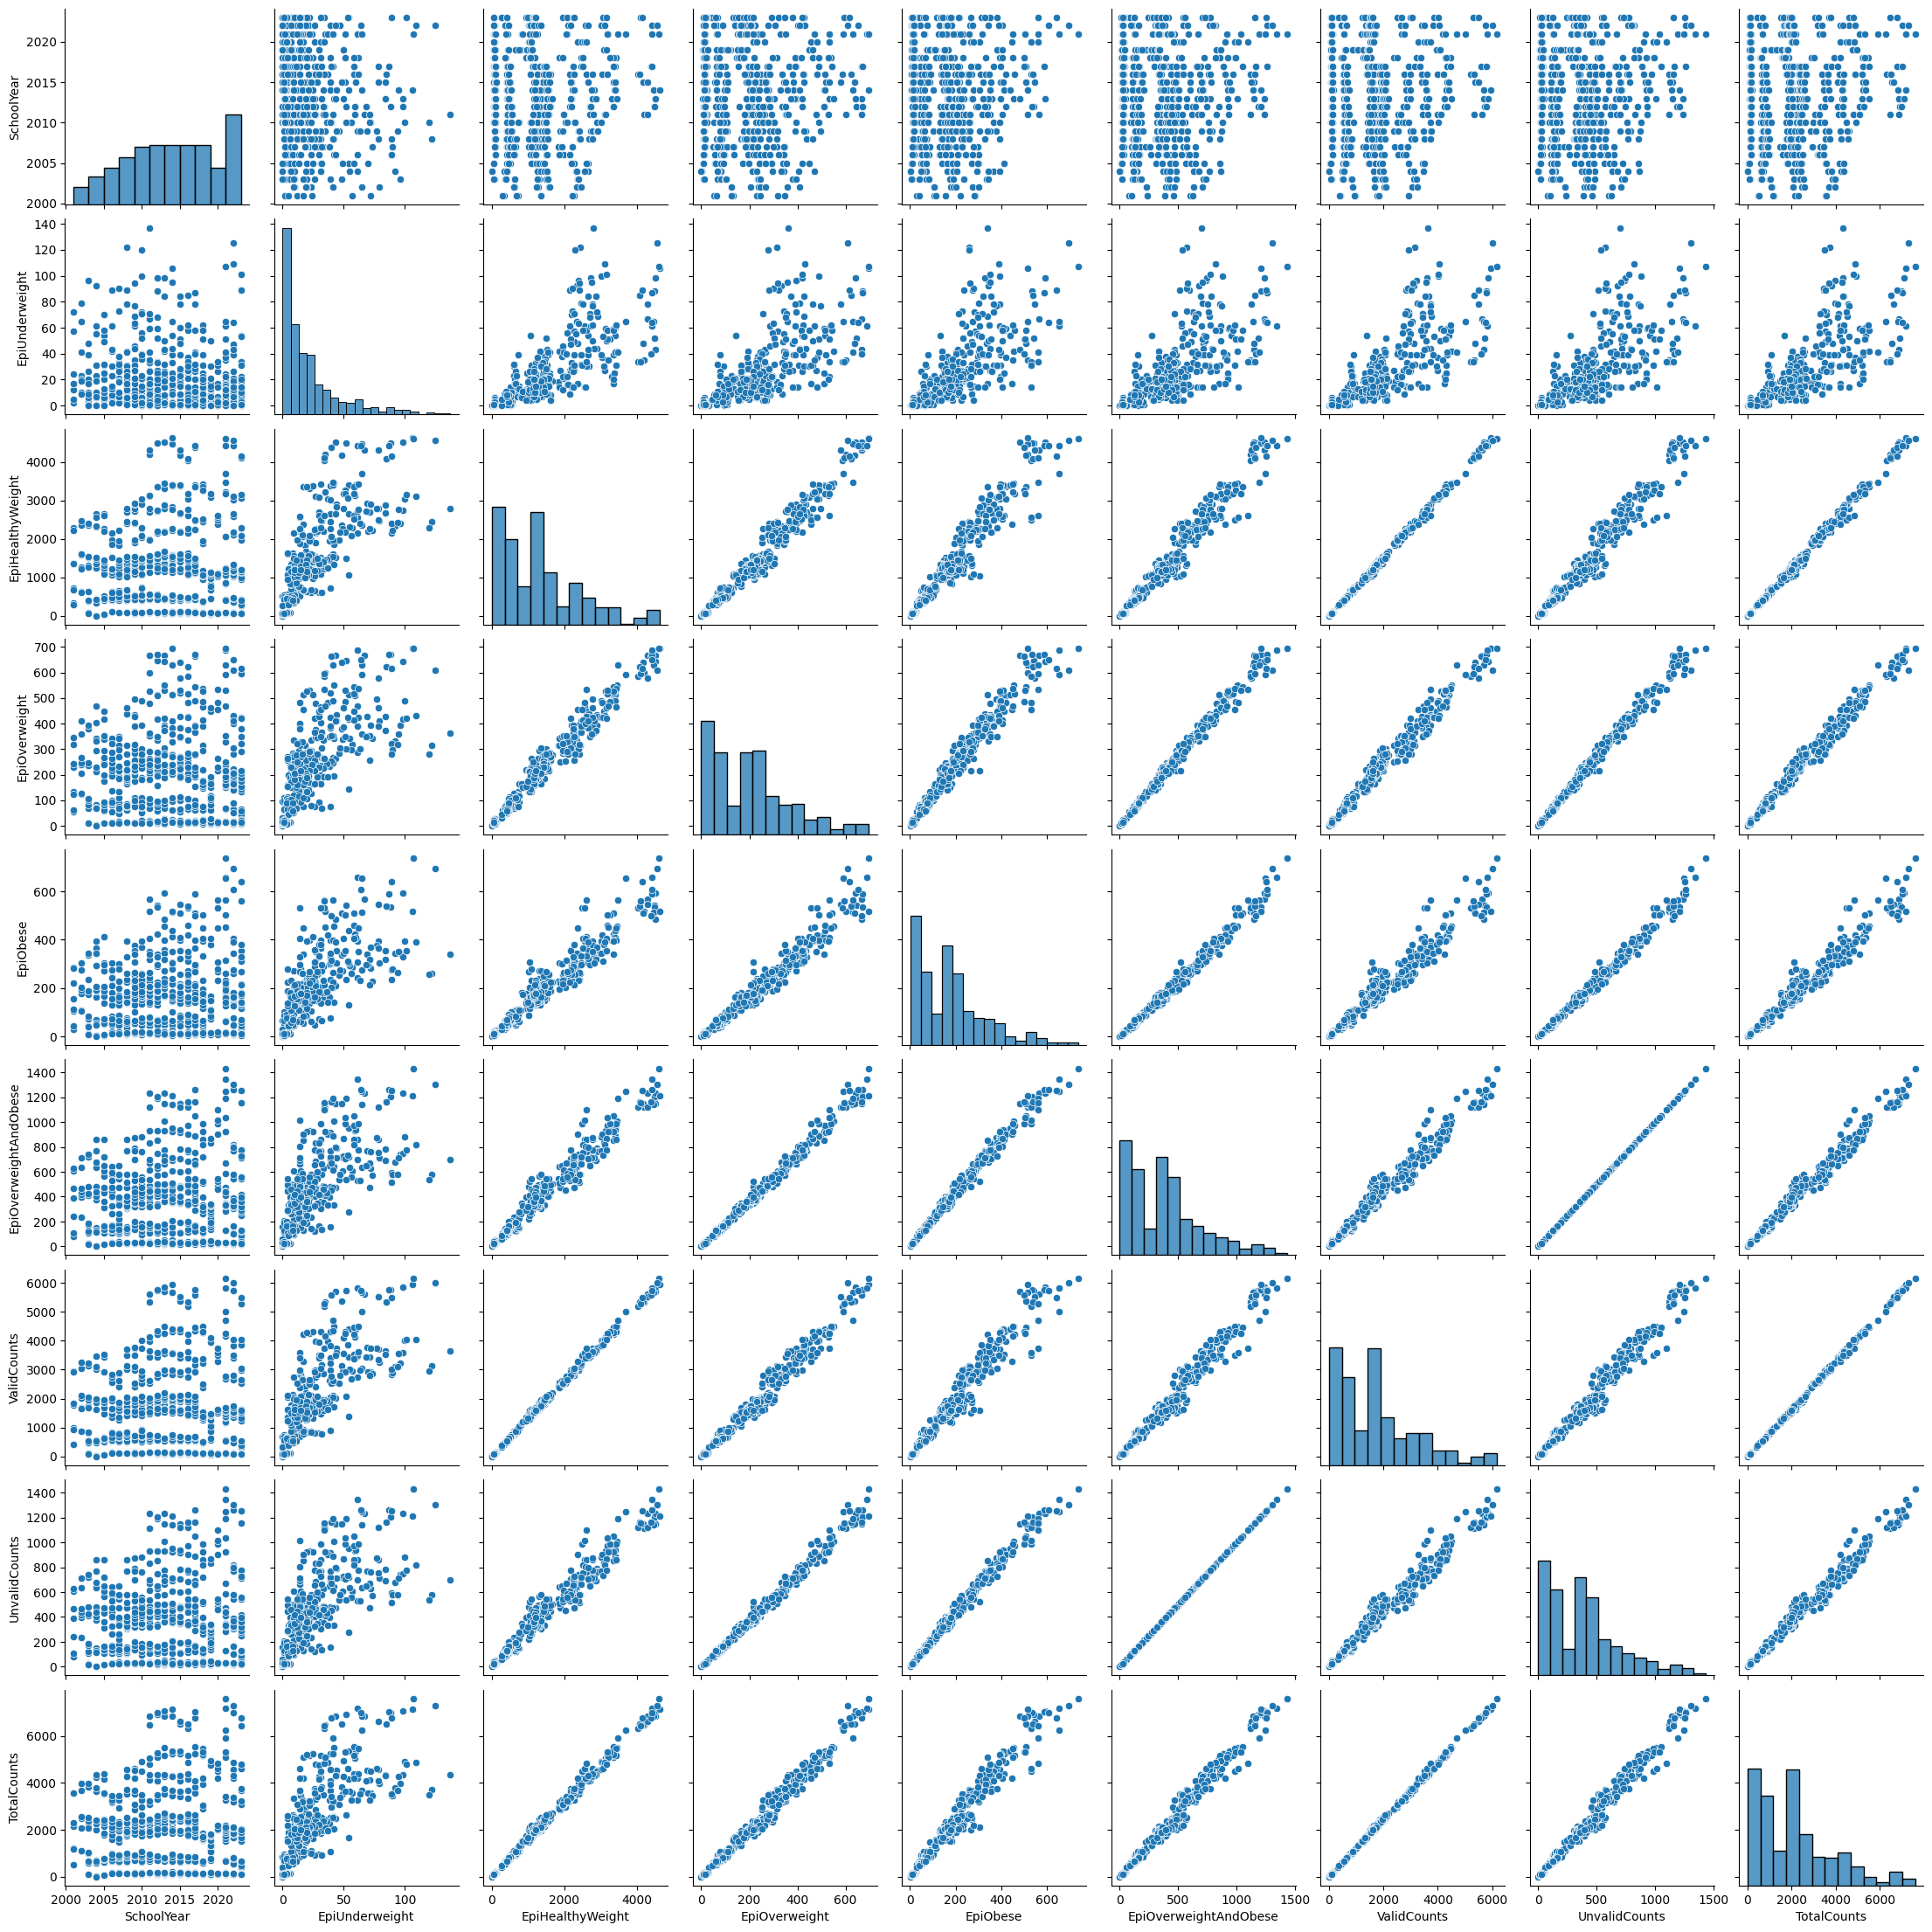

In [16]:
sns.pairplot(df[numerical_col])
plt.show()

In [17]:
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_col] < (Q1 - 1.5 * IQR)) | (df[numerical_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
print(Q1)

print(Q3)

print(IQR)

SchoolYear               2009.00
EpiUnderweight              3.00
EpiHealthyWeight          421.75
EpiOverweight              66.75
EpiObese                   52.00
EpiOverweightAndObese     120.50
ValidCounts               549.00
UnvalidCounts             120.50
TotalCounts               669.50
Name: 0.25, dtype: float64
SchoolYear               2018.00
EpiUnderweight             30.00
EpiHealthyWeight         1946.25
EpiOverweight             292.00
EpiObese                  243.00
EpiOverweightAndObese     537.00
ValidCounts              2523.25
UnvalidCounts             537.00
TotalCounts              3038.75
Name: 0.75, dtype: float64
SchoolYear                  9.00
EpiUnderweight             27.00
EpiHealthyWeight         1524.50
EpiOverweight             225.25
EpiObese                  191.00
EpiOverweightAndObese     416.50
ValidCounts              1974.25
UnvalidCounts             416.50
TotalCounts              2369.25
dtype: float64


In [19]:
df.to_csv('AFter_Analysis_dataset.csv',index=False)